# Analysis on Zomato Bangalore Restaurants

## Packages Installing and Importing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## Handling Null Values

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<AxesSubplot:>

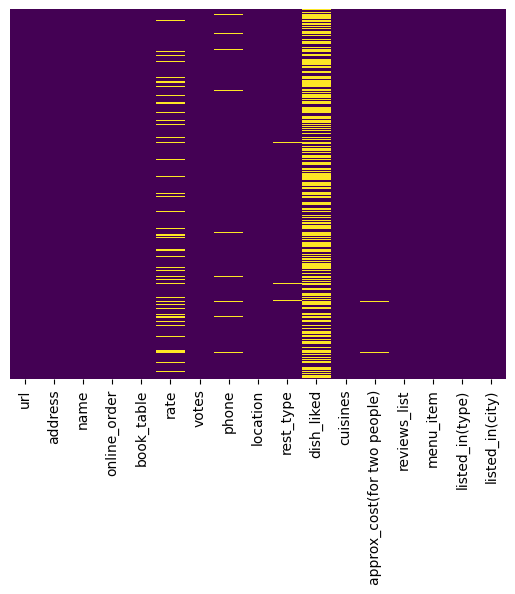

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Dropping Irrelevant Columns

In [9]:
df.drop(['url', 'address', 'book_table', 'phone', 'listed_in(type)', 'listed_in(city)', 'menu_item'], axis=1, inplace=True)

In [10]:
df.head(2)

,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."


In [11]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [12]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

## Splitting Dataset

In [13]:
online_orders_df = df[df['online_order']=='Yes'] 

In [14]:
online_orders_df.shape

(30444, 10)

In [15]:
offline_orders_df = df[df['online_order']=='No'] 

In [16]:
offline_orders_df.shape

(21273, 10)

In [17]:
online_location_names = online_orders_df['location'].value_counts().index

In [18]:
online_location_values = online_orders_df['location'].value_counts().values

([<matplotlib.patches.Wedge at 0x21a0015da30>,
 [Text(0.8398948503062141, 0.7103355829670244, 'BTM'),
  Text(-0.2590822615730877, 1.0690539657744946, 'HSR'),
  Text(-0.9149785305003483, 0.6105852018542732, 'Koramangala 5th Block'),
  Text(-1.0991645188436758, -0.04286444348350523, 'Jayanagar'),
  Text(-0.9031045163203689, -0.6280145162348978, 'Indiranagar'),
  Text(-0.4326198127106471, -1.0113555742913591, 'JP Nagar'),
  Text(0.12453437445285602, -1.0929278062066294, 'Whitefield'),
  Text(0.6099102839154297, -0.9154285584217919, 'Marathahalli'),
  Text(0.9354038736139276, -0.5788087708631059, 'Bannerghatta Road'),
  Text(1.0822835080407356, -0.19662758764486454, 'Koramangala 1st Block')],
 [Text(0.45812446380338945, 0.38745577252746777, '22.35%'),
  Text(-0.14131759722168422, 0.5831203449679061, '12.88%'),
  Text(-0.49907919845473536, 0.33304647373869445, '10.82%'),
  Text(-0.5995442830056413, -0.023380605536457395, '9.15%'),
  Text(-0.4926024634474739, -0.34255337249176243, '8.95%'),


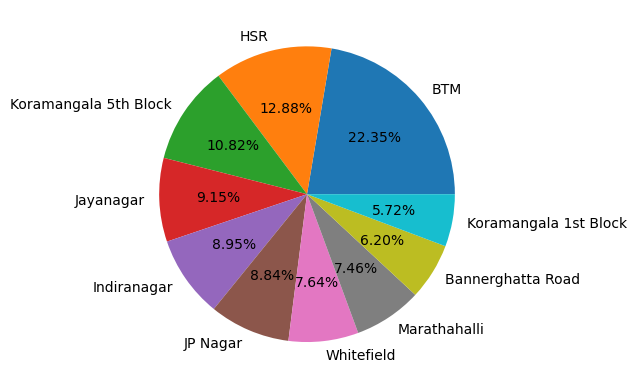

In [19]:
# Pie Chart Top 10 Area's with Highest Online Orders
plt.pie(online_location_values[:10], labels = online_location_names[:10], autopct='%1.2f%%')

### Observation
1. Maximum Orders Online Orders Comes from BTM that is 22.35%, than Second most online orders comes from HSR Area with 12.88%, and on third position Koramanagala 5th Block has online 10.82%
2. Area's with least online orders are Marathahalli(7.46%), Bannerghatta Raod(6.20%), Koramangala 1st Block(5.72%)

In [20]:
offline_location_names = offline_orders_df['location'].value_counts().index
offline_location_values = offline_orders_df['location'].value_counts().values

([<matplotlib.patches.Wedge at 0x21a001e8c10>,
 [Text(0.8746831678902999, 0.6670302510451754, 'BTM'),
  Text(-0.10720943689765582, 1.0947630504543382, 'Whitefield'),
  Text(-0.7863246706335766, 0.7692161675062462, 'JP Nagar'),
  Text(-1.0924240018463247, 0.1288790137689667, 'Koramangala 5th Block'),
  Text(-0.976661703434638, -0.5060947708128898, 'Indiranagar'),
  Text(-0.5786051911126371, -0.9355298139650648, 'Marathahalli'),
  Text(-0.03338849938268251, -1.0994931596462858, 'Bannerghatta Road'),
  Text(0.5020069172246093, -0.9787691530992609, 'Electronic City'),
  Text(0.8887890543982175, -0.6481157433529311, 'HSR'),
  Text(1.076873852109054, -0.22437180447598032, 'Richmond Road')],
 [Text(0.4770999097583453, 0.3638346823882775, '20.74%'),
  Text(-0.05847787467144862, 0.5971434820660025, '11.63%'),
  Text(-0.42890436580013264, 0.41957245500340695, '10.61%'),
  Text(-0.5958676373707225, 0.07029764387398184, '10.30%'),
  Text(-0.5327245655098025, -0.2760516931706671, '8.66%'),
  Text(-

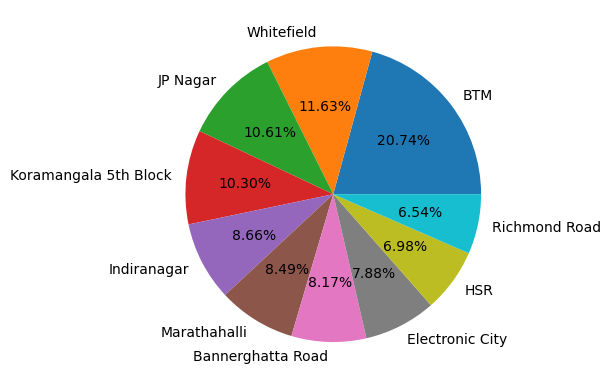

In [21]:
# Pie Chart Top 10 Area's with Highest Offline Orders
plt.pie(offline_location_values[:10], labels = offline_location_names[:10], autopct='%1.2f%%')

### Observation
1. Offline orders means people in this area mostly prefer to go and have lunch/dinner in restaurant and area with highest offline business is BTM with 20.74%, BTM Area is the highest business making area in offline and online orders.
2. Whitefield comes on second place with 11.63% and JP Nagar on third with 10.61%

### Ratings
Splitting the rate value with .split() to have proper ratings with different column, first add new column i.e Ratings.After that checking the unique values within Ratings to check whether some unproper/error values are within column dropping the rows with values like 'New','-' with .drop and .loc, also dropping nan values. 

In [22]:
online_orders_df['Ratings'] = online_orders_df['rate'].str.split('/').str[0]

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\595599037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df['Ratings'] = online_orders_df['rate'].str.split('/').str[0]


In [23]:
online_orders_df.head(2)

,name,online_order,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,Ratings
0,Jalsa,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1
1,Spice Elephant,Yes,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1


In [24]:
online_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30444 entries, 0 to 51705
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         30444 non-null  object
 1   online_order                 30444 non-null  object
 2   rate                         28308 non-null  object
 3   votes                        30444 non-null  int64 
 4   location                     30444 non-null  object
 5   rest_type                    30327 non-null  object
 6   dish_liked                   16508 non-null  object
 7   cuisines                     30428 non-null  object
 8   approx_cost(for two people)  30444 non-null  object
 9   reviews_list                 30444 non-null  object
 10  Ratings                      28308 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.8+ MB


In [25]:
online_orders_df['Ratings'].unique()

array(['4.1', '3.8', '4.6', '4.0', '4.2', '3.9', '3.1', '3.0', '3.7',
       '3.6', '2.8', '4.4', '3.2', '3.3', '3.5', '4.5', '4.3', '3.4',
       '2.5', nan, '2.9', 'NEW', '2.6', '2.7', '2.4', '3.4 ', '3.9 ',
       '4.0 ', '4.1 ', '3.7 ', '3.1 ', '2.9 ', '-', '3.6 ', '3.8 ',
       '3.3 ', '3.5 ', '3.2 ', '2.6 ', '4.2 ', '4.5 ', '4.3 ', '4.4 ',
       '2.3', '4.9', '4.7', '2.2', '2.1', '4.8', '4.6 ', '4.9 ', '2.8 ',
       '3.0 ', '2.5 ', '2.7 ', '2.3 ', '2.4 ', '4.8 ', '2.1 ', '4.7 ',
       '2.2 '], dtype=object)

In [26]:
online_orders_df.drop('rate', axis=1, inplace=True)

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\2240190652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df.drop('rate', axis=1, inplace=True)


In [27]:
online_orders_df.head()

,name,online_order,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,Ratings
0,Jalsa,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1
1,Spice Elephant,Yes,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1
2,San Churro Cafe,Yes,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8
5,Timepass Dinner,Yes,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",3.8
7,Onesta,Yes,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",4.6


In [32]:
online_orders_df.drop(online_orders_df.loc[online_orders_df['Ratings'] == 'NEW'].index, inplace=True)
online_orders_df.drop(online_orders_df.loc[online_orders_df['Ratings'] == '-'].index, inplace=True)

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\315030724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df.drop(online_orders_df.loc[online_orders_df['Ratings'] == 'NEW'].index, inplace=True)
C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\315030724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df.drop(online_orders_df.loc[online_orders_df['Ratings'] == '-'].index, inplace=True)


In [33]:
online_orders_df.head()

,name,online_order,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,Ratings
0,Jalsa,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1
1,Spice Elephant,Yes,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1
2,San Churro Cafe,Yes,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8
5,Timepass Dinner,Yes,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",3.8
7,Onesta,Yes,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",4.6


In [34]:
online_orders_df['Ratings'] = online_orders_df['Ratings'].astype(float)

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\20696518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df['Ratings'] = online_orders_df['Ratings'].astype(float)


In [35]:
online_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29342 entries, 0 to 51705
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         29342 non-null  object 
 1   online_order                 29342 non-null  object 
 2   votes                        29342 non-null  int64  
 3   location                     29342 non-null  object 
 4   rest_type                    29227 non-null  object 
 5   dish_liked                   16447 non-null  object 
 6   cuisines                     29326 non-null  object 
 7   approx_cost(for two people)  29342 non-null  object 
 8   reviews_list                 29342 non-null  object 
 9   Ratings                      27206 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.5+ MB


In [36]:
online_orders_df['Ratings'].unique()

array([4.1, 3.8, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.7, 3.6, 2.8, 4.4, 3.2,
       3.3, 3.5, 4.5, 4.3, 3.4, 2.5, nan, 2.9, 2.6, 2.7, 2.4, 2.3, 4.9,
       4.7, 2.2, 2.1, 4.8])

In [40]:
online_orders_df['Ratings'].fillna(3.9, inplace = True)

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\2094823725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df['Ratings'].fillna(3.9, inplace = True)


In [43]:
online_orders_df.head()

,name,online_order,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,Ratings
0,Jalsa,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1
1,Spice Elephant,Yes,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1
2,San Churro Cafe,Yes,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8
5,Timepass Dinner,Yes,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",3.8
7,Onesta,Yes,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",4.6


In [46]:
online_orders_df['approx_cost(for two people)'].unique()

array(['800', '600', '700', '550', '500', '650', '400', '200', '750',
       '150', '300', '450', '850', '100', '250', '350', '1,200', '1,500',
       '1,300', '1,000', '900', '199', '1,600', '1,100', '230', '130',
       '80', '1,700', '1,400', '950', '1,800', '180', '2,100', '3,000',
       '40', '2,000', '1,900', '120', '2,500', '1,050', '50', '1,250'],
      dtype=object)

In [47]:
online_orders_df['approx_cost(for two people)'] = online_orders_df['approx_cost(for two people)'].str.replace(',','')

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\724309134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df['approx_cost(for two people)'] = online_orders_df['approx_cost(for two people)'].str.replace(',','')


In [48]:
online_orders_df['approx_cost(for two people)'] = online_orders_df['approx_cost(for two people)'].astype(int)

C:\Users\Rishikesh Salvi\AppData\Local\Temp\ipykernel_1592\2863499882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_orders_df['approx_cost(for two people)'] = online_orders_df['approx_cost(for two people)'].astype(int)


In [50]:
online_orders_df.describe()

,votes,approx_cost(for two people),Ratings
count,29342.000000,29342.000000,29342.000000
mean,318.554086,529.580329,3.735366
std,747.846741,338.322515,0.410525
min,0.000000,40.000000,2.100000
25%,21.000000,300.000000,3.500000
50%,77.000000,450.000000,3.800000
75%,273.000000,650.000000,4.000000
max,16832.000000,3000.000000,4.900000


<AxesSubplot:xlabel='Ratings', ylabel='count'>

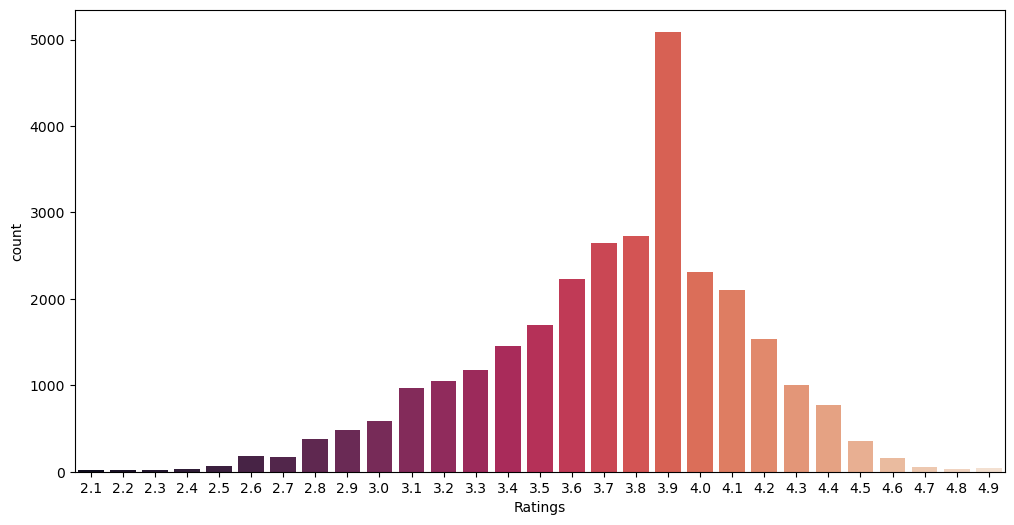

In [55]:
# Countplot
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.countplot(x = 'Ratings', data=online_orders_df,  palette='rocket')

### Observation
1. Maximum number of customers that is 5000 gives 3.9 rating on Zomato
2. Average rating given by customers in between 3.6 to 4.1


### What are 10 Top Dishes liked and ordered  by customers?

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

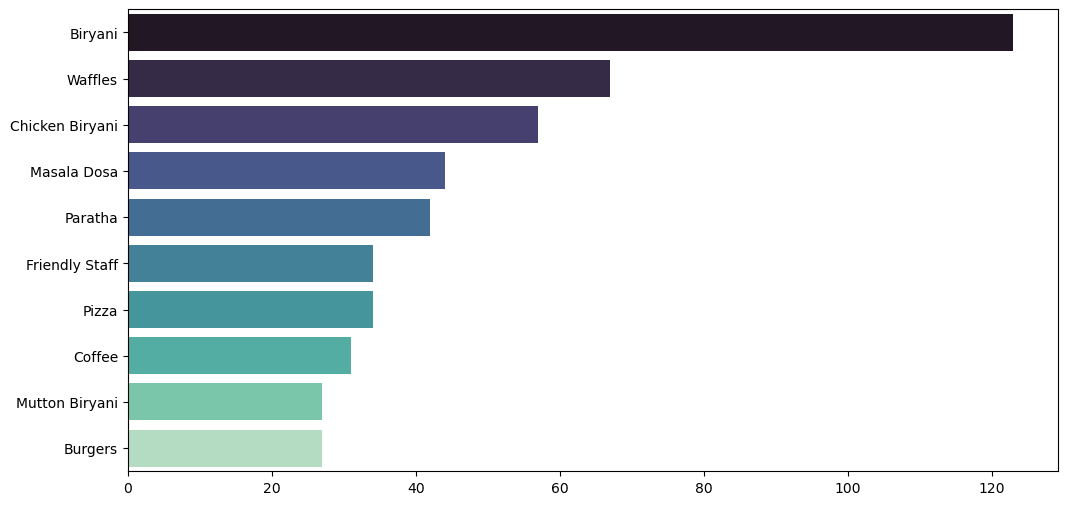

In [76]:
sns.barplot(list(online_orders_df['dish_liked'].value_counts()[:10]),list(online_orders_df['dish_liked'].value_counts()[:10].keys()),palette='mako')


### What are top 10 Cuisines Ordered?

In [75]:
online_orders_df['cuisines'].value_counts()[:10]

North Indian                           1682
North Indian, Chinese                  1280
South Indian                            718
Bakery, Desserts                        460
Biryani                                 454
Desserts                                417
Fast Food                               412
South Indian, North Indian, Chinese     352
Cafe                                    320
Chinese                                 317
Name: cuisines, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

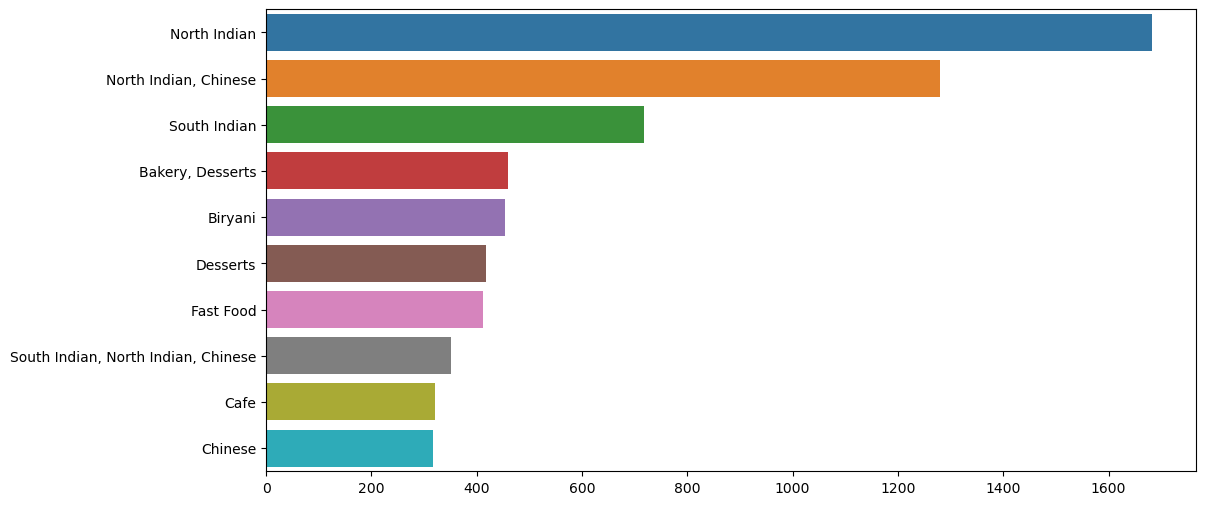

In [78]:
sns.barplot(list(online_orders_df['cuisines'].value_counts()[:10]),list(online_orders_df['cuisines'].value_counts()[:10].keys()))


(array([27138.,  2150.,    54.]),
 array([  40.        , 1026.66666667, 2013.33333333, 3000.        ]),
 <BarContainer object of 3 artists>)

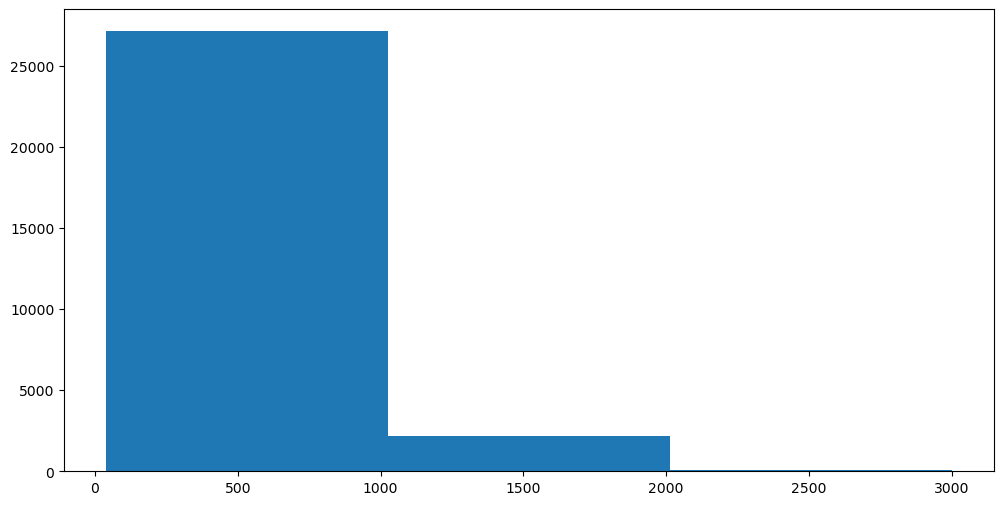

In [90]:
plt.hist(online_orders_df['approx_cost(for two people)'], bins=3)